# Decision tree predicting the categorical column of house type in Melbourne dataset

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("dark")

In [2]:
df = pd.read_csv('melbourne_housing_prices.csv', sep=',')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [5]:
len(df)

63023

In [6]:
df_model = df.dropna()

# Predict house type based on price
Types: 
br - bedroom(s);  
h - house,cottage,villa, semi,terrace;  
u - unit, duplex;  
t - townhouse;  
dev site - development site;  
o res - other residential.  

In [7]:
df_train, df_test = train_test_split(df_model, test_size=0.4, stratify=df_model['Type'], random_state=42)

In [8]:
features = ['Price']
dt_classification = DecisionTreeClassifier(max_depth = 2) # Increase max_depth to see effect in the plot
dt_classification.fit(df_train[features], df_train['Type'])

DecisionTreeClassifier(max_depth=2)

In [9]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [10]:
predictionsOnTrainset = dt_classification.predict(df_train[features])
predictionsOnTestset = dt_classification.predict(df_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, df_train.Type)
accuracyTest = calculate_accuracy(predictionsOnTestset, df_test.Type)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7259712997694346
Accuracy on test set 0.7280891917002168


Setting the max_depth above 3 lowers the accuracy on the test slightly and 2 to 3 doesn't make a difference. That is surprising since you would expect there to be more layers than that with 5 types of houses

In [11]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

Types: 
br - bedroom(s);  
h - house,cottage,villa, semi,terrace;  
u - unit, duplex;  
t - townhouse;  
dev site - development site;  
o res - other residential.  

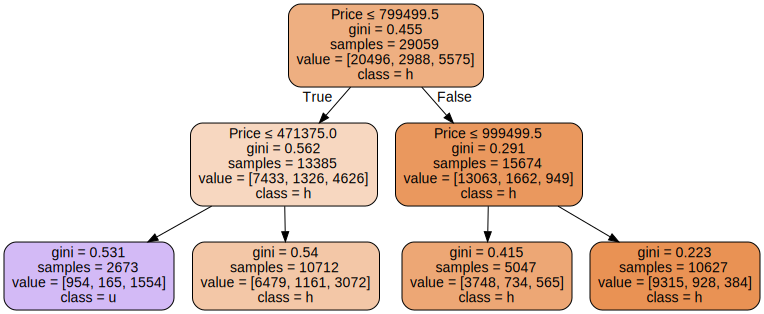

In [12]:
plot_tree_classification(dt_classification, features, df.Type.unique())

In [13]:
df.Type.unique()

array(['h', 't', 'u'], dtype=object)

Turns out that in practice there are only 3 types (of which the price is available) and that only houses and units/duplexes are really sold in high numbers